In [18]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_exp1 = pd.read_csv('/home/rafaelfabrichimidt/Documentos/projetos/Mestrado/ArtigoIA/Resultados_Experimentos/Experimento_1/query_sql_request_consolidado.csv')
df_exp2 = pd.read_csv('/home/rafaelfabrichimidt/Documentos/projetos/Mestrado/ArtigoIA/Resultados_Experimentos/Experimento_2/query_sql_request_consolidado.csv')
df_exp3 = pd.read_csv('/home/rafaelfabrichimidt/Documentos/projetos/Mestrado/ArtigoIA/Resultados_Experimentos/Experimento_3/query_sql_request_consolidado.csv')

In [6]:
df_exp1['Experimento'] = 'Experimento 1'
df_exp2['Experimento'] = 'Experimento 2'
df_exp3['Experimento'] = 'Experimento 3'

In [7]:
df = pd.concat([df_exp1, df_exp2, df_exp3])

In [9]:
df.reset_index(inplace = True, drop=True)

,Experimento,requisicao,count
5,Experimento 1,Falha,0
0,Experimento 1,Sucesso,100
2,Experimento 2,Falha,127
1,Experimento 2,Sucesso,373
4,Experimento 3,Falha,82
3,Experimento 3,Sucesso,418


0      0
1    100
2    127
3    373
4     82
5    418
Name: count, dtype: int64


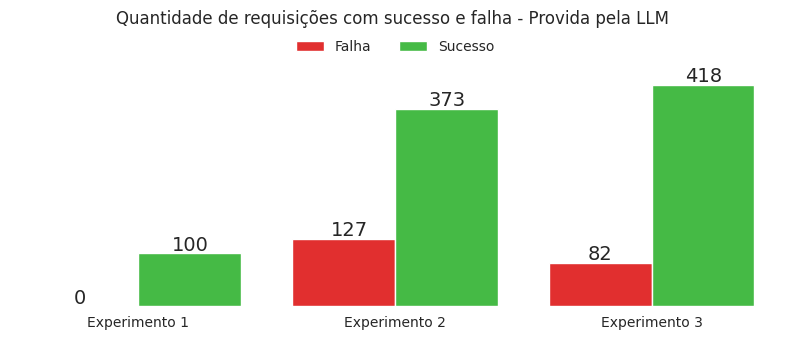

In [101]:
graph = pd.DataFrame(df.groupby('Experimento')['requisicao'].value_counts()).reset_index()
graph = pd.concat( [graph, pd.DataFrame([['Experimento 1', 'Falha', 0]], columns=graph.columns) ])
graph = graph.sort_values(by = ['Experimento', 'requisicao']).reset_index(drop = True)

sns.set_style('white')

fig, ax = plt.subplots(figsize = (8, 3.5))

sns.barplot(x = graph['Experimento'], y = graph['count'], hue = graph['requisicao'], ax = ax, palette=['#FF1111', '#32CD32'])

for axis in ['bottom', 'top', 'left', 'right']:
    ax.spines[axis].set_visible(None)

ax.tick_params(axis = 'y', left = False, labelleft = False)

ax.set_xlabel('')
ax.set_ylabel('')
ax.set_title('Quantidade de requisições com sucesso e falha - Provida pela LLM \n \n ')

print(graph['count'])
sns.move_legend(
    ax, "upper center",  
    bbox_to_anchor=(.5, 1.2), ncol=2, title=None, frameon=False,
)
j = -0.25
for i in range(0, graph.shape[0], 1):
    if (i%2 != 0):
        ax.text(x = j - 0.12, y = graph.loc[i, 'count'] + 5, s = graph.loc[i, 'count'], size = 14)

    else:
        ax.text(x = j, y = graph.loc[i, 'count'] + 5, s = graph.loc[i, 'count'], size = 14)

    j = j + 0.5

fig.tight_layout();

fig.savefig('Query_Requisicao.png', dpi = 300, transparent=True)